# Mixed Strategy Nash Equilibria

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import nashpy as n 

# user written 
import bimatrix

# for plotting purposes
cc = ['r','b','g'] # color order 
ll = ['--', '-.', ':'] # line style order 

# Shoppers and Loyals

In [3]:
def s(pi, pj):
    if pi < pj: 
        return 0.75
    elif pi > pj: 
        return 0.25
    elif pi == pj: 
        return 0.5
    else:
        raise Exception(f'Unexpected outcome for pi,pj = {pi,pj}')
        
def q(pi, pj, M=2): 
    return M*s(pi,pj)

def profit(pi, pj):
    qi = q(pi, pj)
    return pi*qi

### Plot profile of $\pi_1$ for $p_2 = 50$

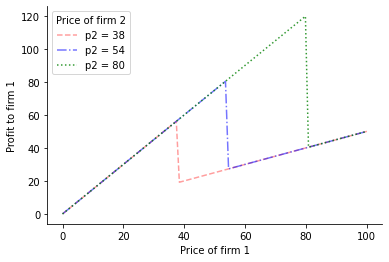

In [26]:
p2 = 50
xx = np.linspace(0, 100, 100)

fig,ax = plt.subplots()

for i,p2 in enumerate([38,54,80]):
    yy = [profit(p, pj=p2) for p in xx]

    ax.plot(xx, yy, ll[i], color=cc[i], label=f'p2 = {p2}', alpha=p2/100);
    
ax.set_xlabel('Price of firm 1');
ax.set_ylabel('Profit to firm 1');
ax.legend(title='Price of firm 2');
for x in ['top', 'right']:
    ax.spines[x].set_visible(False)

plt.savefig('img/shoppersloyals.pdf')

In [5]:
pp = np.array([80, 54, 38])
G = pp.size
U1 = np.empty((G,G))
U2 = np.empty((G,G))
for i1,p1 in enumerate(pp):
    for i2,p2 in enumerate(pp):
        U1[i1,i2] = profit(p1,p2)
        U2[i1,i2] = profit(p2,p1)

In [6]:
tab = bimatrix.print_payoffs(U1,U2)
tab.columns = [f'$p_2={p}$' for p in pp]
tab.index   = [f'$p_1={p}$' for p in pp]
tab

,$p_2=80$,$p_2=54$,$p_2=38$
$p_1=80$,"(80.0, 80.0)","(40.0, 81.0)","(40.0, 57.0)"
$p_1=54$,"(81.0, 40.0)","(54.0, 54.0)","(27.0, 57.0)"
$p_1=38$,"(57.0, 40.0)","(57.0, 27.0)","(38.0, 38.0)"


In [7]:
g = n.Game(U1, U2)
g

Bi matrix game with payoff matrices:

Row player:
[[80. 40. 40.]
 [81. 54. 27.]
 [57. 57. 38.]]

Column player:
[[80. 81. 57.]
 [40. 54. 57.]
 [40. 27. 38.]]

In [9]:
eqs = list(g.support_enumeration())
print(f'Found {len(eqs)} equilibria!')

Found 1 equilibria!


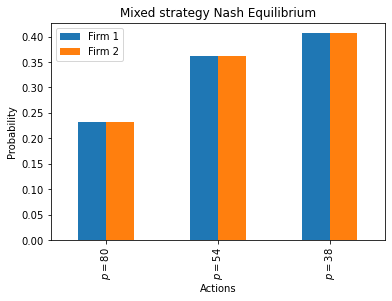

In [24]:
eq = pd.DataFrame(eqs[0], columns=[f'$p = {p}$' for p in pp], index=['Firm 1', 'Firm 2'])
eq.index.name = 'Price'
ax = eq.T.plot.bar(); 
ax.legend();
ax.set_xlabel('Actions');
ax.set_ylabel('Probability');
ax.set_title('Mixed strategy Nash Equilibrium');